<a href="https://colab.research.google.com/github/sauravroutt/WeatherImageClassification/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
data_path = "/content/drive/MyDrive/Multi-class Weather Dataset"

In [75]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

In [76]:
list_ds = tf.data.Dataset.list_files(str(data_path+'/*/*'))

for f in list_ds.take(5):
  print(f.numpy())

b'/content/drive/MyDrive/Multi-class Weather Dataset/Sunrise/sunrise188.jpg'
b'/content/drive/MyDrive/Multi-class Weather Dataset/Rain/rain31.jpg'
b'/content/drive/MyDrive/Multi-class Weather Dataset/Cloudy/cloudy273.jpg'
b'/content/drive/MyDrive/Multi-class Weather Dataset/Rain/rain69.jpg'
b'/content/drive/MyDrive/Multi-class Weather Dataset/Shine/shine83.jpg'


In [77]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

Found 1125 files belonging to 4 classes.
Using 900 files for training.
Found 1125 files belonging to 4 classes.
Using 225 files for validation.
['Cloudy', 'Rain', 'Shine', 'Sunrise']


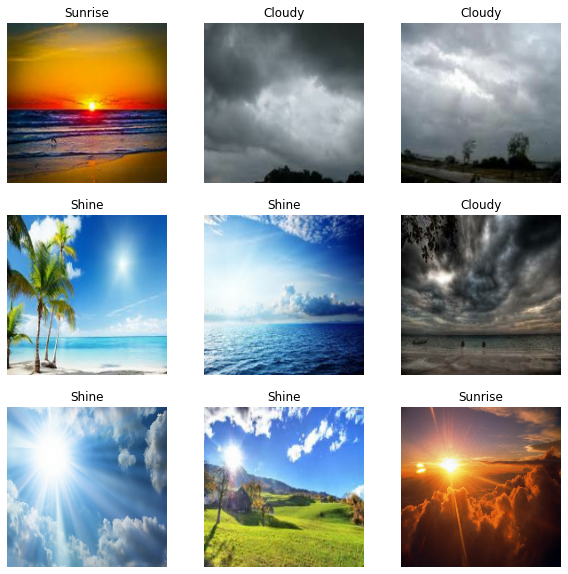

In [78]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

batch_size = 32
img_height = 180
img_width = 180 # we can change these based on what improves model performance

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names) # if this prints out the 5 weather classes, then we're on the right track

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10)) # This will display our images
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [79]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))#x represents the images and y represents the category

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'), #4 layers, 32 kernels, 3x3 kernel size
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'), #layer 2
  tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'), #layer 3
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'), #layer 4
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'), #layer 5
  # tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(192, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [80]:
model.compile(
  optimizer='adam', #backprobogation gives the gradient, the optimizer uses the gradient to perform an update
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #crossentropy measures distance between probability distributions
  metrics=['accuracy'])

In [81]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=7
)

Epoch 1/10
29/29 [==============================] - 39s 1s/step - loss: 1.5423 - accuracy: 0.6678 - val_loss: 0.5289 - val_accuracy: 0.8000
Epoch 2/10
29/29 [==============================] - 36s 1s/step - loss: 0.4358 - accuracy: 0.8333 - val_loss: 0.5287 - val_accuracy: 0.8089
Epoch 3/10
29/29 [==============================] - 35s 1s/step - loss: 0.3010 - accuracy: 0.8956 - val_loss: 0.4188 - val_accuracy: 0.8267
Epoch 4/10
29/29 [==============================] - 38s 1s/step - loss: 0.2296 - accuracy: 0.9156 - val_loss: 0.6311 - val_accuracy: 0.8000
Epoch 5/10
29/29 [==============================] - 36s 1s/step - loss: 0.2233 - accuracy: 0.9189 - val_loss: 0.4213 - val_accuracy: 0.8800
Epoch 6/10
29/29 [==============================] - 36s 1s/step - loss: 0.1351 - accuracy: 0.9456 - val_loss: 0.4661 - val_accuracy: 0.8622
Epoch 7/10
29/29 [==============================] - 37s 1s/step - loss: 0.1557 - accuracy: 0.9422 - val_loss: 0.5315 - val_accuracy: 0.8356
Epoch 8/10
29/29 [==

To improve val_accuracy:
-  Change rescaling factor(**last**)
-  Change 'relu' activation function(**last**)
-  Change the number of layers(**second**), number of kernels, size of kernel
-  Add more dense layers(**third**), change the number
-  Change the number of epochs(Does this **first**) 6 or 7

Question:
Does more epochs mean higher accuracy?

Keep in mind:
-  Keep track of progress and how changes are helping/hurting.
-  Change one thing at a time.
-  Put in GitHub(add Adi and Jiao Jiao)